In [27]:
from Bio import AlignIO
from Bio.Align.Applications import ClustalOmegaCommandline
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo import draw
from Bio import SeqIO
from Bio import Phylo, AlignIO
import subprocess
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from Bio.Align.Applications import ClustalOmegaCommandline

#Genomic Data from https://www.ncbi.nlm.nih.gov/labs/virus/vssi/#/

In [28]:
os.listdir('sequences/') # show fasta files to import:

['cov_mers.fasta',
 'cov_Rhinolophus.fasta',
 'all.fasta',
 'cov_anatidae.fasta',
 'aligned.fasta',
 'cov_sapiens.fasta',
 'cov_gallus.fasta']

# Read the data from fasta files:

Data can be downloaded here: https://www.ncbi.nlm.nih.gov/labs/virus/vssi/

Here we explore several string of the Coronaviridae familly from different host species: 

Gallus: Chicken, covid19: H. Sapiens, Rhinolophus: Bat, Anatidae: Duck, Mers: H. Sapiens MERS.

In [29]:
gallus = SeqIO.read("sequences/cov_gallus.fasta", "fasta") #Chicken
covid19 = SeqIO.read("sequences/cov_sapiens.fasta", "fasta") #H. Sapiens Covid-19
rhinolophus = SeqIO.read("sequences/cov_Rhinolophus.fasta", "fasta") #Bat
anatidae = SeqIO.read("sequences/cov_anatidae.fasta", "fasta")# Duck/swan
mers = SeqIO.read('sequences/cov_mers.fasta', 'fasta') # H. Sapiens MERS

In [30]:
list_rec=[gallus, covid19, rhinolophus, anatidae, mers]

In [31]:
#reads = SeqIO.parse(file,"fasta")
end = []

for record in list_rec:
    #record[:n].append(end)
    end.append(record)
    
SeqIO.write(end, "sequences/all.fasta", "fasta")

5

# Alignement

Performed using clustral.
be sure to download the binaries from http://www.clustal.org/omega/

the binary file must be saved in the same folder as the execution file (this one) and permission must be adapted (for Linux/MAC: chmod 777 clustal-omega-1.2.3-macosx  Change the binary file name with the one corresponding to your download)

In [32]:
# Define input file
in_file = "sequences/all.fasta"

# Define output file
out_file = "sequences/aligned.fasta"

# Get the command for Clustal Omega
clustalomega_cline = ClustalOmegaCommandline(infile=in_file, outfile=out_file, verbose=True, auto=True)

# Print the executable command
print(clustalomega_cline)

clustalo -i sequences/all.fasta -o sequences/aligned.fasta --auto -v


In [34]:
!./clustal-omega-1.2.3-macosx -i sequences/all.fasta -o sequences/aligned.fasta --auto -v

Using 8 threads
Read 5 sequences (type: DNA) from sequences/all.fasta
not more sequences (5) than cluster-size (100), turn off mBed
Setting options automatically based on input sequence characteristics (might overwrite some of your options).
Auto settings: Enabling mBed.
Auto settings: Setting iteration to 1.
Using 4 seeds (chosen with constant stride from length sorted seqs) for mBed (from a total of 5 sequences)
Calculating pairwise ktuple-distances...
Ktuple-distance calculation progress done. CPU time: 3.82u 0.02s 00:00:03.84 Elapsed: 00:00:01
mBed created 1 cluster/s (with a minimum of 1 and a soft maximum of 100 sequences each)
Distance calculation within sub-clusters done. CPU time: 3.79u 0.00s 00:00:03.79 Elapsed: 00:00:02
Guide-tree computation (mBed) done.
Progressive alignment progress done. CPU time: 405.05u 11.45s 00:06:56.50 Elapsed: 00:04:18
Iteration step 1 out of 1
Computing new guide tree (iteration step 0)
Calculating pairwise aligned identity distances...
Pairwise i

In [35]:
align = AlignIO.read("sequences/aligned.fasta", "fasta")
print(align)

SingleLetterAlphabet() alignment with 5 rows and 38109 columns
ACTGAAAATAGATATTAATATATATCTATTGCACTAGCCTTGCG...--- KX389094
-------------------------------------------A...AAA MN996528
--------------------------------------------...--- NC_028824
--------------------------------------------...AAA JQ065048
--------------------------------------------...--- NC_019843


# Calculate distance:

In [36]:
calculator = DistanceCalculator('identity')
dm = calculator.get_distance(align)

# Create the Phylogenetic Tree


Distance Matrix
KX389094	0
MN996528	0.5535962633498648	0
NC_028824	0.5359888740192605	0.5481382350625836	0
JQ065048	0.5541210737621034	0.6240520611928941	0.5973392112099505	0
NC_019843	0.5669789288619487	0.45634889396205625	0.5343357212207089	0.6321079010207562	0
	KX389094	MN996528	NC_028824	JQ065048	NC_019843

Phylogenetic Tree:
  ________________________________________________________________ JQ065048
 |
_|                 _________________________________________________ NC_019843
 |       _________|
 |      |         |_________________________________________________ MN996528
 |______|
        | __________________________________________________________ NC_028824
        ||
         |__________________________________________________________ KX389094



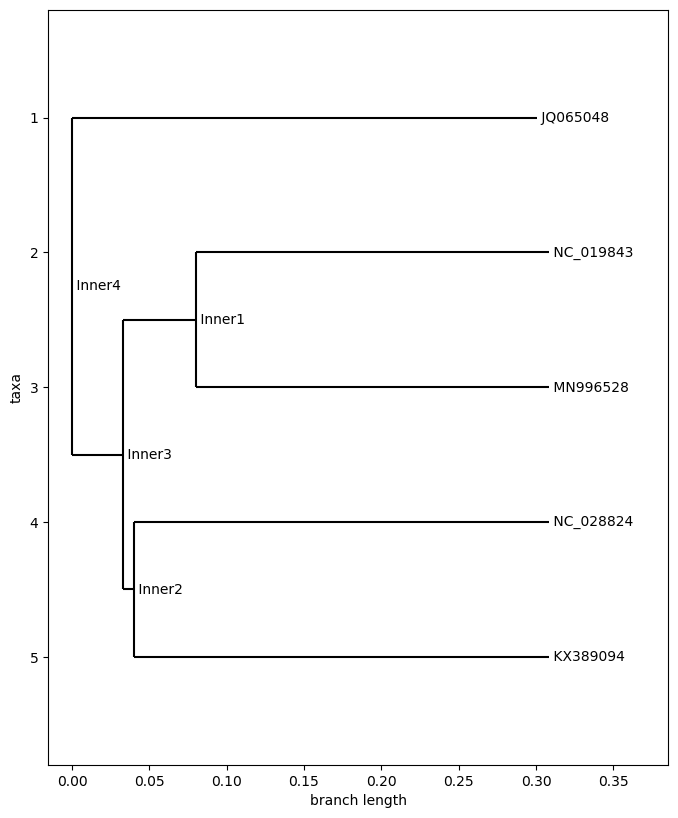

In [44]:
print('\nDistance Matrix\n===================')
print(dm)

# Construct the phylogenetic tree using UPGMA algorithm
constructor = DistanceTreeConstructor()
tree = constructor.upgma(dm)

# Draw the phylogenetic tree
#Phylo.draw(tree)

fig = plt.figure(figsize=(8, 10), dpi=100)
axes = fig.add_subplot(1, 1, 1)
#Phylo.draw(tree, axes=axes, label_func=get_label)
Phylo.draw(tree, axes=axes, do_show=False)
plt.savefig('tree.png')
# Print the phylogenetic tree in the terminal
print('\nPhylogenetic Tree:\n===================')
Phylo.draw_ascii(tree)

In [ ]:
#MN996528 --> H. Sapiens (COVID19), NC_019843:H. Sapiens (MERS), JQ065048-->anatidae, NC_028824-->rhinolophus, KX389094-->galus